In [1]:
%load_ext line_profiler
%load_ext memory_profiler

In [4]:
# imports
import numpy as np
from neuron import *
from system_functions import *

In [3]:
# initializations
weights_arbor = [
    [[0.2,0.5]],
    [[0.2,0.2],[0.5,0.5]],
    [[.21,.21],[.22,.22],[.51,.51],[.52,.52]]
]

In [4]:
# function to profile
def create_neuron():
    return Neuron(weights=weights_arbor)

In [5]:
%lprun -f create_neuron create_neuron()

Timer unit: 1e-07 s

Total time: 0.0005394 s
File: C:\Users\rmo2\AppData\Local\Temp\1\ipykernel_45556\3225309975.py
Function: create_neuron at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def create_neuron():
     3         1       5394.0   5394.0    100.0      return Neuron(weights=weights_arbor)

In [7]:
%mprun -f create_neuron create_neuron()

ERROR: Could not find file C:\Users\rmo2\AppData\Local\Temp\1\ipykernel_45556\3225309975.py



### Scratch Work

In [6]:
import matplotlib.pyplot as plt

4000


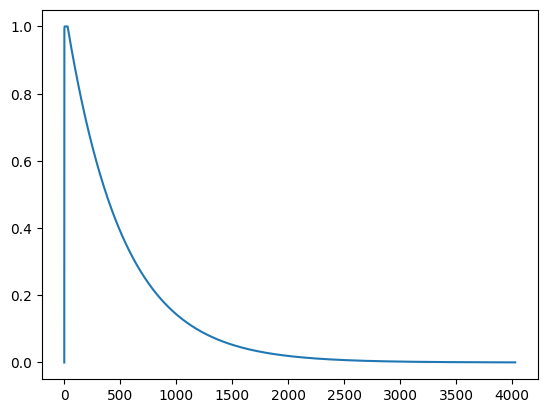

In [19]:

def generic_synaptic_event(dt):
    tau_rise         = 0.02/dt
    tau_fall         = 50/dt
    hotspot_duration = 3
    hotspot          = int(hotspot_duration/dt)
    spd_duration     = int(8*tau_fall)
    
    flux_rise = [(1-np.exp(-t/tau_rise)) 
                 for t in range(hotspot)]

    flux_fall = [(1-np.exp(-hotspot/tau_rise))*np.exp(-(t-hotspot)/tau_fall) 
                 for t in range(hotspot,hotspot+spd_duration)]
    
    return np.concatenate([flux_rise,flux_fall])

flux_spd = generic_synaptic_event(0.1)
plt.plot(flux_spd)
plt.show()

500 403
403 10 413 413
403 60 463 463
403 110 513 500
403 160 563 500
403 210 613 500
403 260 663 500
403 310 713 500
403 360 763 500
403 410 813 500
403 460 863 500


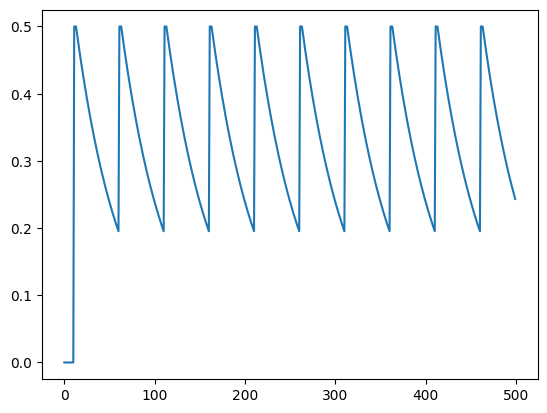

In [33]:
def generic_synaptic_event(dt):
    tau_rise         = 0.02/dt
    tau_fall         = 50/dt
    hotspot_duration = 3
    hotspot          = int(hotspot_duration/dt)
    spd_duration     = int(8*tau_fall)
    flux_peak        = 0.5
    
    flux_rise = [flux_peak*(1-np.exp(-t/tau_rise)) 
                 for t in range(hotspot)]

    flux_fall = [flux_peak*(1-np.exp(-hotspot/tau_rise))*np.exp(-(t-hotspot)/tau_fall) 
                 for t in range(hotspot,hotspot+spd_duration)]
    
    return np.concatenate([flux_rise,flux_fall])


def initialize_synapses(spike_times,tf,dt,time_steps):
    flux_spd = generic_synaptic_event(dt)
    syn_flux = np.zeros((time_steps,))
    print(len(syn_flux),len(flux_spd))
    for spk_t in spike_times:

        flux_final_idx = int(len(flux_spd))
        spike_time     = int(spk_t/dt)
        maxed          = flux_final_idx+spike_time
        spd_tf         = np.min([maxed,time_steps])

        print(flux_final_idx,spike_time,maxed,spd_tf)
            
        syn_flux[spike_time:spd_tf] = np.maximum(flux_spd[:spd_tf-spike_time],syn_flux[spike_time:spd_tf])

    plt.plot(syn_flux)
    plt.show()

spike_times = np.arange(10,500,50)
tf = 500
dt = 1
time_steps = int(tf/dt)
initialize_synapses(spike_times,tf,dt,time_steps)

In [44]:
total = 0
for i  in range(2,10): 
    total+=2**i
print(total)

# plt.title(r"Max total Dendrites = $\sum^9_{n=1}2^n$=1020",fontsize=20)
# plt.show()

1020
